

>    # **[M1MINT] DIOUF Mamadou**

> ## **PROJET OPTIMISATION: Points de Torricelli généralisés**



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial import distance


In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gp
import pyproj

\
Nous considérerons , pour $p\epsilon(1,+\infty)$ et $(x_i)_{[[1,n]]}$ des points non alignés dans le plan, la fonction

$\begin{cases} J_p : & \mathbb R^2 \to \mathbb R \\
& x \mapsto J_p(x) = \sum_{i=1}^n {\lVert x - x_i \rVert}_p \end{cases}$        
 \



In [ ]:
def Jp(X,Xi,p):
  Jp=0
  for i in Xi:
      Jp+=distance.minkowski(np.array(X),np.array(i),p)
  return Jp

\
**Test**  
 \


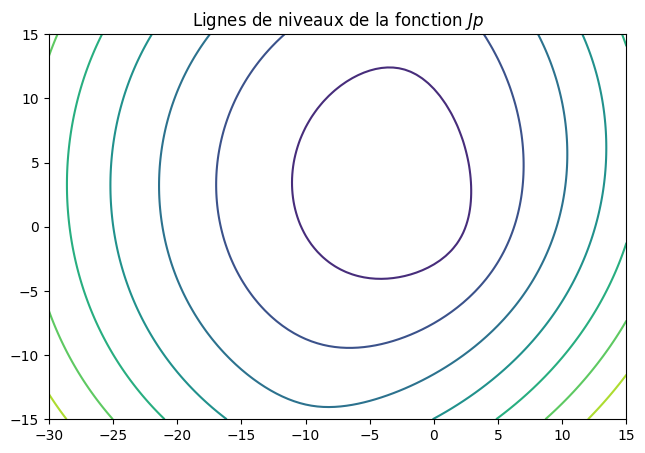

In [ ]:
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0]
    ,[0, 20],[-98, -85],[-50, 50],[-60, -35]]
aX0=np.linspace(-30,15,100)
aX1=np.linspace(-15,15,100)
Z=np.array([[Jp([x0,x1],gr,2) for x0 in aX0] for x1 in aX1])
plt.figure(figsize=(10,5))
plt.contour(aX0,aX1,Z) #trace les lignes de niveaux de la fonction fa
plt.title("Lignes de niveaux de la fonction $Jp$")
plt.axis("scaled")
plt.show()


\
**1. Optimisation sans contrainte dans plan**  
 \

\
**1.** Pour tout $x$ dans $\mathbb R^2$. Soit $m = {\underset{i\epsilon[[1,n]]}{\text argmin}{\lVert x - x_i \rVert}_p}$  
$J_p(x) \geq n{\lVert x - x_m \rVert}_p \geq |{\lVert x  \rVert}_p - {\lVert x_m  \rVert}_p|$   $\underset{{\lVert x  \rVert}_p \to +\infty}{\to}$ ${+\infty}$ alors $J_p(x)$ $\underset{{\lVert x  \rVert}_p \to +\infty}{\to}$ ${+\infty}$  
Donc $J_p$ est coercive  
 \

\
**2.** Pour tout ${\lambda \epsilon [0,1]}$ et $x,y \epsilon \mathbb R^2$ nous avons
${\lVert {\lambda}x +(1-{\lambda})y - x_i \rVert}_p = {\lVert {\lambda}(x-x_i) +(1-{\lambda})(y - x_i) \rVert}_p \leq {\lambda}{\lVert x - x_i\rVert}_p$ $+ (1-{\lambda}){\lVert y - x_i\rVert}_p$  
Nous avons égalité si $x_i$ est dans le segment $[x,y]$ or les $x_i$ ne sont pas alignés alors l'inégalité est stricte pour la somme c'est à dire:  
$J_p({\lambda}x+(1-\lambda)y) < {\lambda}\sum_{i=1}^n {\lVert x - x_i \rVert}_p + (1 - \lambda)\sum_{i=1}^n {\lVert y - x_i \rVert}_p$$= {\lambda}J_p(x) + (1 -\lambda)J_p(y)$  
Donc $J_p$ est strictement convexe.  
 \

\
**3.** Comme $J_p$ est strictement convexe et coercive alors admet un unique minimum global sur $\mathbb R^2$.  

Soient $(x_i)_{[[1,c]]}$ les sommets du polygone de l'enveloppe convexe de $(x_i)_{[[1,n]]}$ (avec $c \leq n$). Soit $x$ un point hors de l'enveloppe et $x'$ son symétrique par rapport à un arrête. Donc pour tout $i$, ${\lVert x' - x_i \rVert}_p \leq {\lVert x - x_i \rVert}_p$  alors $J_p(x') \leq J_p(x)$ ce contredit la minimalité en $x$. Donc le minimum est dans $Conv((x_i)_{[[1,n]]})$.  
 \

\
**4.** **L'enveloppe convexe par le parcours de Graham**

La première étape de cet algorithme consiste à rechercher le point de plus petite ordonnée, appelé pivot. Si plusieurs points ont la même plus petite ordonnée, l'algorithme choisit parmi eux le point de plus petite abscisse.(le point le plus bas).  
L'ensemble des points (le pivot compris) est ensuite trié en fonction de l'angle que chacun d'entre eux fait avec l'axe des abscisses relativement au pivot. une complexité de $O(n log (n))$.
Puis nous considérons les triplets de points successifs, pour déterminer lesquels sont dans l'enveloppe.  
 \

\
**Point Plus bas** retourne le plus bas points et la liste qui commence par lui.  
 \

In [ ]:
def point_plus_bas(points):
    i_pb = 0
    for i in range(len(points)):
        point = points[i]
        p_plus_bas = points[i_pb]
        if (point[1] < p_plus_bas[1]) or ((point[1] == p_plus_bas[1]) &
                                          (point[0] < p_plus_bas[0])):
          i_pb = i
    c,b = points[i_pb], points[0]
    points[i_pb], points[0] = b,c

    return c,points

\
**Calcul de l'angle**  
  \

In [ ]:
def Angle(A, B):
    if A[0] == B[0] and A[1] == B[1]:
        return math.pi
    else:
        return math.atan2(B[1] - A[1], B[0] - A[0])   #artan(AH,AB) avec H la projection de B l'axe
                                                  #horizontale qui passe par par d'après Pythagore
                                                  #cette tangente  = BH/HA

\
**Trie des points par angle croissant**  
 \

In [ ]:
def triepoints(points):
  pivot,points=point_plus_bas(points)
  n=len(points)
  if len(points)>=3:
    x=sum(points[:3][0])/3.
    y=sum(points[:3][1])/3.

    g=[x,y]
    #print(x,y,g)
    for  i in range(n):

      for j in range(n-1,i,-1):

        if (Angle(g,points[j])< Angle(g,points[j-1])) or (Angle(g,points[j])==Angle(g,points[j-1]) and points[j][1]<points[j-1][1]):

          points[j-1],points[j]=points[j],points[j-1]

  return points



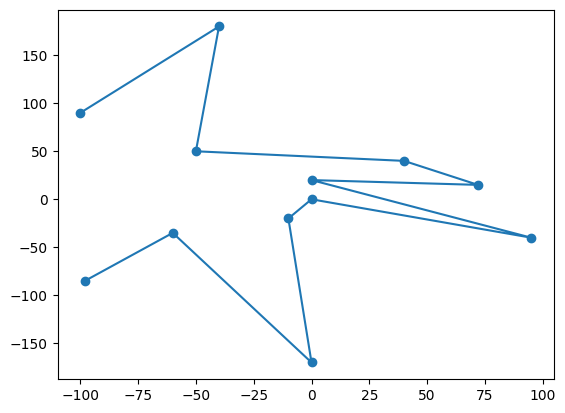

In [ ]:
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0]
    ,[0, 20],[-98, -85],[-50, 50],[-60, -35]]

gr3=triepoints(gr)
#print(gr3)
gh1=[]
gv1=[]
for i in range(len(gr3)):
  gh1.append(gr3[i][0])
  gv1.append(gr3[i][1])
#print(gh1,gv1)
plt.scatter(gh1,gv1)
plt.plot(gh1,gv1)

\
Pour tester qu'un point A est à droite d'une segment $[BC]$, on vérifie que le produit vectoriel est négatif, c'est-à-dire on vérifie que $produitVectoriel(A, B, C) <= 0$ où produitVectoriel est défini par ː  
 \

In [ ]:
def produitvect(A, B, C):
    return (B[1] - A[1]) * (C[0] - A[0]) - (B[0] - A[0]) * (C[1] - A[1])


\
**Enveloppe convexe**  
 \

In [ ]:
def Conv(points):

  points = triepoints(points)
  #print(points)

  env = [points[0],points[1]]

  for i  in range(2,len(points)):

      while len(env)>1  and (produitvect(env[-2],env[-1],points[i]) >= 0 ):
            env.pop()

      env.append(points[i])

  return env



[[-98, -85], [0, -170], [95, -40], [72, 15], [-40, 180], [-100, 90]]


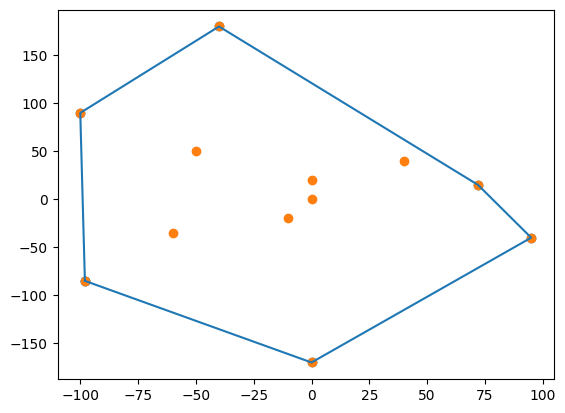

In [ ]:
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0]
    ,[0, 20],[-98, -85],[-50, 50],[-60, -35]]
gr2=Conv(gr)

print(gr2)
gh=[]
gv=[]
for i in range(len(gr2)):
  gh.append(gr2[i][0])
  gv.append(gr2[i][1])
gv.append(gv[0])    #nous ajoutons en dernier élément le premier pour
gh.append(gh[0])     #avoir le polygone
plt.scatter(gh,gv)

plt.scatter(gh1,gv1)
plt.plot(gh,gv)

\
Un point est dans l'enveloppe convexe si et seulement si c'est un barycentre des points l'enveloppe de masses positives et que la somme des masses égale 1;
Soit $x_o$ l'isobarycentre de l'enveloppe de convexe. Alors pour tout $x$, dans $\mathscr C$ , $J(x) \leq J(x_0)$. Donc $(R>0)$ , $K = \begin{Bmatrix} x \epsilon \ B_F(x_0,R) \cap \mathscr C,\  J(x) \leq J(x_0) \end{Bmatrix}$ est un fermé borné de $\mathbb R^2$, donc compact. D'après le cours le cours $J$ admet un minimum dans $\ B_F(x_0,R) \cap \mathscr C$. D'où la stabilité des algorithmes du cours.  
 \

\
**Isobarycentre des sommets de l'enveloppe convexe $x_0$**  
 \

In [ ]:
def isobary(env_conv):
  n=len(env_conv)
  Gx = 0
  Gy = 0
  for i in range(n):
    Gx +=  env_conv[i][0]
    Gy += env_conv[i][1]
  return [Gx/n,Gy/n]


In [ ]:
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0],[0, 20],[-98, -85],[-50, 50],[-60, -35]]
e=Conv(gr)
print(e)
print(isobary(e))

[[-98, -85], [0, -170], [95, -40], [72, 15], [-40, 180], [-100, 90]]
[-11.833333333333334, -1.6666666666666667]


\
**Méthode gradient à pas fixe**  
 \

\
La fonction gradient de $J_p$ notée $gradJ$ définit pour tout $x\neq x_{i\epsilon[[1,n]]}$ par :  
$gradJ_p(x) = (\sum_{i=1}^n$ $(x_1 - x_{i_1})|x_1 - x_{i_1}|^{p-2}$ ${\lVert x - x_i \rVert}_p^{1-p}$ $, \sum_{i=1}^n(x_2 - x_{i_2})|x_2 - x_{i_2}|^{p-2}\ {\lVert x - x_i \rVert}_p^{1-p})$  
 \

In [ ]:
def gradJ(x,Xi,p=2):  #Xi suite xi et p de la norme
  global compteur
  compteur=compteur+1
  grad1=0
  grad2=0
  for i in Xi:
      d=(distance.minkowski(x,i,p))**(1-p)
      grad1 += (x[0]-i[0])*(abs(x[0]-i[0])**(p-2))*d
      grad2 += (x[1]-i[1])*(abs(x[1]-i[1])**(p-2))*d

  return [grad1,grad2]


**fonction méthode descente à pas fixe**

In [ ]:
def methodeDescente(alpha,X0,Xi,gradJ,eps,p=2,N=1500):
  X=X0
  lX=[X]
  gX=gradJ(X0,Xi,p)
  n=0
  #print(distance.minkowski(np.array(gX),np.array([0,0]),p),distance.minkowski(np.array(gX),np.array([0,0]),p)>eps)
  while np.linalg.norm(np.array(gX))>eps and n<N:
    n+=1
    X[0]=X[0]-alpha*gX[0]
    X[1]=X[1]-alpha*gX[1]
    #print(X)
    gX=gradJ(X,Xi,p)
    lX.append(X)
  if n==N:
      print("Nombre d’itérations maximal atteint : ",N)

  return X,lX

In [ ]:
#methode descente pas fixe avec p=2 et 5
for alpha in np.arange(0.001,1,0.05):
  eps=1e-5
  gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0]
      ,[0, 20],[-98, -85],[-50, 50],[-60, -35]]
  compteur=0
  m1=methodeDescente(alpha,isobary(e),gr,gradJ,eps,2)[0]
  mn=methodeDescente(alpha,isobary(e),gr,gradJ,eps,5)[0]

  print(gradJ(m1,gr,2),gradJ(mn,gr,5))            #sortie pour p=2 et p=5
#distance.minkowski(np.array([1,0]),np.array([0,0]))

Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500
[-1.1486241483989743, -0.6514077285003839] [-1.4075685839948462, -0.9369804380522851]
Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500
[-2.6719147896314688e-05, 2.7574147362541268e-05] [-7.727663927503681e-05, 0.00010318918919885456]
[-6.875971475306386e-06, 7.0954597071182235e-06] [-5.993334637688363e-06, 8.003132462935936e-06]
[-6.89029511469208e-06, 7.110239345742286e-06] [-5.969443094056004e-06, 7.97122922030491e-06]
[-6.866445550479661e-06, 7.085626263614309e-06] [-5.9034630794929654e-06, 7.88312366648003e-06]
[-6.9240505128354e-06, 7.145069945924121e-06] [-5.893493538300376e-06, 7.869810992655601e-06]
[-6.9560380968614055e-06, 7.178077845670927e-06] [-5.861387808336893e-06, 7.826939036975622e-06]
[-6.838994454638758e-06, 7.0572935724211305e-06] [-5.78377745941161e-06, 7.723303053625008e-06]
[-6.801413672152812e-06, 7.018510768896924e-06] [-5.8961780712296

In [ ]:
print("L'optimum trouvé avec p = 2: ",m1)
print("L'optimum trouvé avec p = 5: ",mn)


L'optimum trouvé avec p = 2:  [-2.377083017825123, 1.9647751698477671]
L'optimum trouvé avec p = 5:  [-1.5010184704712861, 2.0128026619053174]


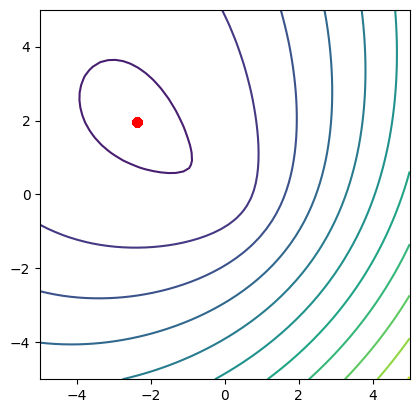

In [ ]:
l=methodeDescente(0.55,isobary(e),gr,gradJ,eps,2,1500)[1]
lx0=[X[0] for X in l]
lx1=[X[1] for X in l]
aX0=np.linspace(-5,5)
aX1=np.linspace(-5,5)
Z=np.array([[Jp([x0,x1],gr,2) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)
plt.plot(lx0,lx1,"-ro")
plt.axis('scaled')
plt.show()


\
N'importe quelle alpha supérieure ou égale $0,1$ est bon.  
 \

\
**Méthode gradient à pas optimal**  
 \

\
On se donne une fonction f continue sur $[a_0, b_0]$. On pose $\alpha =$
$(\sqrt5-1)/2$ et $c_0 = a_0 + (1-\alpha)(b_0-a_0)$ et $d_0 = a_0 + \alpha(b_0-a_0)$. On calcule $f(a_0)$, $f(b_0)$, $f(c_0)$, et $f(d_0)$, et on suppose qu’un
des triplets $(a_0, c_0, b_0)$ ou $(a_0, d_0, b_0)$ est admissible.
On définit les suites par récurrence :  
— si $f(c_n) < f(d_n)$, alors le triplet $(a_n, c_n, d_n)$ est admissible, on pose $(a_{n+1}, d_{n+1}, b_{n+1}) = (a_n, c_n, d_n)$ et $c_{n+1} = a_{n+1}+(1-\alpha)$$(b_{n+1}−a_{n+1})$. On a simplement besoin de calculer $f(c_{n+1})$,
puisque $f(a_{n+1}), f(d_{n+1})$ et $f(b_{n+1})$ sont déja connues.  
— si $f(c_n) > f (d_n)$, alors le triplet $(c_n, d_n, b_n)$ est admissible, on pose $(a_{n+1}, c_{n+1}, b_{n+1}) = (c_n, d_n, b_n)$ et $d_{n+1} = a_{n+1} + \alpha$$(b_{n+1}-a_{n+1})$. On a simplement besoin de calculer $f(d_{n+1})$,
puisque $f(a_{n+1})$, $f(c_{n+1})$ et $f(b_{n+1})$ sont déja connues.  
 \

\
Voici une fonction de recherche de pas optimal à l’aide de la méthode de la section dorée. Pour éviter d’évaluer les fonctions là où elles sont déjà calculées, on donne comme arguments la fonction  $f$ , le point  $x_k$ , la valeur de  $f(x_k)$ , la direction de descente  $d_k$  et un pas par défaut  $α$  ainsi qu’une tolérance.

On renvoie le point  $x_{k+1}$ , le nouveau pas  $α_k$  calculé, ainsi que la valeur de  $f(x_{k+1})$  vu qu’elle a déjà été calculée.  
 \

In [ ]:
def recherchePasOptimal(f,Xi,p,xk,fxk,dk,alpha,tol=1e-5):
    invphi=(math.sqrt(5)-1)/2
    a=0
    ha=fxk                                      #f(an)
    b=alpha
    hb=f([xk[0]+b*dk[0],xk[1]+b*dk[1]],Xi,p)    #f(bn)
    c=a+(1-invphi)*(b-a)
    d=a+invphi*(b-a)
    hc=f([xk[0]+c*dk[0],xk[1]+c*dk[1]],Xi,p)     #f(cn)
    hd=f([xk[0]+d*dk[0],xk[1]+d*dk[1]],Xi,p)     #f(dn)
    while hc>ha:
        d,b=c,d
        hd,hb=hc,hd
        c=a+(1-invphi)*(b-a)
        hc=f([xk[0]+c*dk[0],xk[1]+c*dk[1]],Xi,p)
    while hd>hb:
        c,d=d,b
        hc,hd=hd,hb
        b=b+invphi*(b-a)
        hb=f([xk[0]+b*dk[0],xk[1]+b*dk[1]],Xi,p)

    while b-a>tol:
        if hc<hd:
            d,b=c,d
            hd=hc
            c=a+(1-invphi)*(b-a)

            hc=f([xk[0]+c*dk[0],xk[1]+c*dk[1]],Xi,p)
        else:
            a,c=c,d
            hc=hd
            d=a+invphi*(b-a)
            hd=f([xk[0]+d*dk[0],xk[1]+d*dk[1]],Xi,p)

    if hc<hd:

        return [xk[0]+c*dk[0],xk[1]+c*dk[1]],c,hc
    else:

        return [xk[0]+d*dk[0],xk[1]+d*dk[1]],d,hd


**fonction méthode descente à pas optimal**

In [ ]:
def descenteGradientOptimal(Jp,Xi,p,X0,alpha0,tol,tolrecherche=1e-5,N=1500):
    X=X0
    JX=Jp(X0,Xi,p)
    g=gradJ(X0,Xi,p)
    lX=[X]
    n=0
    alpha=alpha0
    while np.linalg.norm(np.array(g))>tol and n<N:
        n+=1
        gg=[]
        for i in g:
          gg.append(-1*i)

        X,alpha,JX=recherchePasOptimal(Jp,Xi,p,X,JX,gg,alpha,tolrecherche)
        #print(X)
        g=gradJ(X,Xi,p)
        lX.append(X)
    if n==N:
        print("Nombre d’itérations maximal atteint : ",N)
    return X,lX

In [ ]:
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0],[0, 20],[-98, -85],[-50, 50],[-60, -35]]
X0=isobary(e)
print("L'isobarycentre des sommets, X0 :",X0)
gg=[]
for i in gradJ(X0,gr,2):
  gg.append(-1*i)

#re=recherchePasOptimal(Jp,gr,2,X0,Jp(X0,gr,2),gg,0.12,1e-5)
#c=re[1]
#print(re)
#print([X0[0]+c*gg[0],X0[1]+c*gg[1]])
mi=descenteGradientOptimal(Jp,gr,2,X0,0.12,1e-5,1e-5,200)[0]

print("L'optimum trouvé: ",mi)
print("Le gradient de l'optimum:",gradJ(mi,gr,2))

L'isobarycentre des sommets, X0 : [-11.833333333333334, -1.6666666666666667]
L'optimum trouvé:  [-2.377056152527816, 1.9647537510043407]
Le gradient de l'optimum: [-2.2417444325295577e-06, 4.787116499205268e-06]


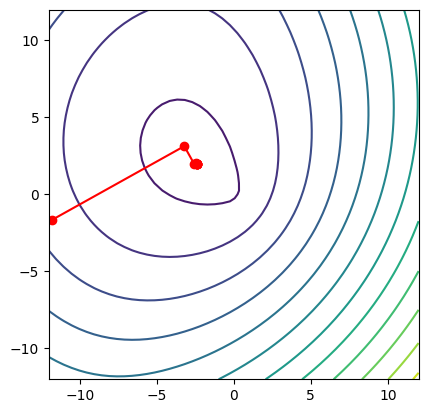

In [ ]:
l=descenteGradientOptimal(Jp,gr,2,X0,0.12,1e-5,1e-5,1500)[1]
lx0=[X[0] for X in l]
lx1=[X[1] for X in l]
aX0=np.linspace(-12,12)
aX1=np.linspace(-12,12)
Z=np.array([[Jp([x0,x1],gr,2) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)
plt.plot(lx0,lx1,"-ro")
plt.axis('scaled')
plt.show()


\
**Méthode gradient conjugué (Polak et Ribière)**  
Comme $J_p$ n'est pas quadratique, nous choisissons l'algorithme du gradient conjugué de Polak et Ribière.  
 \

**fonction méthode descente gradient conjugué**

In [ ]:
def descenteGradientConj(Jp,Xi,p,X0,alpha0,tol,tolrecherche=1e-5,N=1500):
    X=X0
    JX=Jp(X0,Xi,p)
    g=gradJ(X0,Xi,p)
    lX=[X]
    lcompteur=[compteur]
    n=0
    alpha=alpha0
    while np.linalg.norm(np.array(g))>tol and n<N:

        gg=[]
        for i in g:
          gg.append(-1*i)

        X,alpha,JX=recherchePasOptimal(Jp,Xi,p,X,JX,gg,alpha,tolrecherche)

        #print(X)
        gk_1=gradJ(lX[-1],Xi,p)                           #g(k-1)
        normgk_1 = np.linalg.norm(np.array(gk_1))**2      #carré du norme de g(k-1)
        gk = gradJ(X,Xi,p)
        g0 = gk[0] + (gk[0])*(gk[0] - gk_1[0])*(g[0])/normgk_1
        g1 = gk[1] + (gk[1])*(gk[1] - gk_1[1])*(g[1])/normgk_1
        g=[g0,g1]
        lX.append(X)
        lcompteur.append(compteur)
        n+=1
    if n==N:
        print("Nombre d’itérations maximal atteint : ",N)
    return X,lX

In [ ]:
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0],[0, 20],[-98, -85],[-50, 50],[-60, -35]]

minn=descenteGradientConj(Jp,gr,2,X0,0.12,1e-5,1e-5,200)[0]

print("L'optimum trouvé: ",minn)
print("Le gradient de l'optimum:",gradJ(minn,gr,2))

L'optimum trouvé:  [-2.3770681726681913, 1.9647405601090606]
Le gradient de l'optimum: [-7.164226110134564e-06, -1.7766438553667996e-07]


\
Nous constatons que nous trouvons le même optimum $[-2.377,1.964]$.  
 \

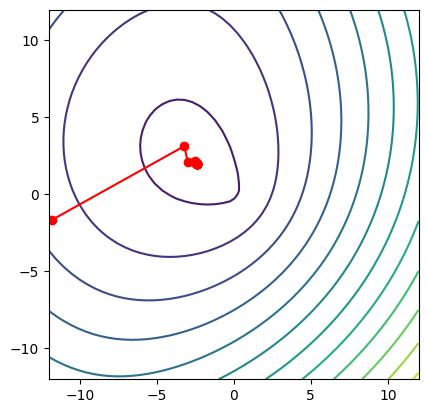

In [ ]:
l=descenteGradientConj(Jp,gr,2,X0,0.12,1e-5,1e-5,1500)[1]
lx0=[X[0] for X in l]
lx1=[X[1] for X in l]
aX0=np.linspace(-12,12)
aX1=np.linspace(-12,12)
Z=np.array([[Jp([x0,x1],gr,2) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)
plt.plot(lx0,lx1,"-ro")
plt.axis('scaled')
plt.show()

In [ ]:
epsilon=np.logspace(-12,-1,10)
print("Les tolérances choisient:",epsilon)
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0],[0, 20],[-98, -85],[-50, 50],[-60, -35]]
e=Conv(gr)
X0=isobary(e)
listen=[]
X0=isobary(e)
for eps in epsilon:
  compteur=0
  a=methodeDescente(0.12,X0,gr,gradJ,eps,2)
  #print(a)

  listen.append(compteur)



Les tolérances choisient: [1.00000000e-12 1.66810054e-11 2.78255940e-10 4.64158883e-09
 7.74263683e-08 1.29154967e-06 2.15443469e-05 3.59381366e-04
 5.99484250e-03 1.00000000e-01]
Nombre d’itérations maximal atteint :  1500


In [ ]:
epsilon=np.logspace(-12,-1,10)
#print(epsilon)
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0],[0, 20],[-98, -85],[-50, 50],[-60, -35]]
e=Conv(gr)
X0=isobary(e)
listenOpt=[]
X0=isobary(e)
for eps in epsilon:
  compteur=0
  a=descenteGradientOptimal(Jp,gr,2,X0,0.12,eps)
  #print(a)

  listenOpt.append(compteur)


Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500


In [ ]:
epsilon=np.logspace(-12,-1,10)
#print(epsilon)
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0],[0, 20],[-98, -85],[-50, 50],[-60, -35]]
e=Conv(gr)
X0=isobary(e)
listenConj=[]
X0=isobary(e)
for eps in epsilon:
  compteur=0
  a=descenteGradientConj(Jp,gr,2,X0,0.12,eps)
  #print(a)

  listenConj.append(compteur)
#print(listenConj)

Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500
Nombre d’itérations maximal atteint :  1500


\
**semilogy()** : idem que la fonction plot() mais l’axe des ordonnées est en échelle logarithmique  
 \

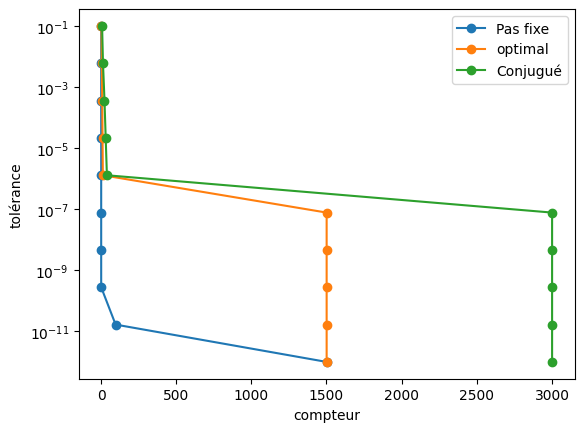

In [ ]:
plt.semilogy(listen,epsilon,"-o",label="Pas fixe")
plt.semilogy(listenOpt,epsilon,"-o",label="optimal")
plt.semilogy(listenConj,epsilon,"-o",label="Conjugué")
plt.xlabel("compteur")
plt.ylabel("tolérance")
plt.legend()
plt.show()


\
En matière de temps nous avons par ordre croissante le pas fixe, pas optimal et gradient conjugué.  
 \

In [ ]:
print("Le gradient de l'optimum du descente à pas fixe",gradJ(m1,gr))  #fixe
print("Le gradient de l'optimum avec la descente à optimal",gradJ(mi,gr)) #optimal
print("Le gradient de l'optimum avec la descente à conjugué",gradJ(minn,gr)) #conjugué

Le gradient de l'optimum du descente à pas fixe [-6.468111497626161e-06, 6.6745478290997085e-06]
Le gradient de l'optimum avec la descente à optimal [-2.241744432307513e-06, 4.787116499538335e-06]
Le gradient de l'optimum avec la descente à conjugué [-7.164226109912519e-06, -1.7766438520361305e-07]


\
La méthode du gradient conjugué est plus précis que les autres mais celle du pas fixe est plus stable.  
 \

\
**Méthode de Newton ordre 2(Quasi Newton)**  
Comme nous n'avons pas une forme quadratique, nous allons utilisé la méthode de quasi Newton, algorithme méthode de correction rang 1,  qui est une alternative de la Newton, et nous épargne du calcul de la Hessienne.  
 \

**fonction méthode quasi Newton**

In [ ]:
def QuasiNewtonOptimal(Jp,Xi,p,X0,alpha0,tol,tolrecherche=1e-5,N=1500):
    X=X0
    JX=Jp(X0,Xi,p)
    g=gradJ(X0,Xi,p)
    S0=np.array([[1,0],[0,1]])    #initialisation par identité
    lX=[X]
    n=0
    alpha=alpha0
    while np.linalg.norm(np.array(g))>tol and n<N:
        n+=1
        gg=np.dot(S0,-1*np.array(g).reshape(2,1)).reshape(1,2)
        g0=g
        X,alpha,JX=recherchePasOptimal(Jp,Xi,p,X,JX,gg[0],alpha,tolrecherche)
        #print(X)
        g=gradJ(X,Xi,p)
        deltak=np.add(np.array(X),-1*np.array(lX[-1]))
        gammak=np.add(np.array(g),-1*np.array(g0))
        Skgamkd= np.add(deltak,-1*np.dot(S0,gammak))
        S0 =  np.add(S0,(1/float((np.dot(np.transpose(Skgamkd),deltak))))*(np.dot(Skgamkd,np.transpose(Skgamkd))))
        lX.append(X)
    if n==N:
        print("Nombre d’itérations maximal atteint : ",N)
    return X,lX

In [ ]:
gr=[[40,40],[72, 15],[-10, -20],[0, -170],[95, -40],[-100, 90],[-40, 180],[0, 0],[0, 20],[-98, -85],[-50, 50],[-60, -35]]

minn1=QuasiNewtonOptimal(Jp,gr,2,X0,0.12,1e-5,1e-5,1500)[0]

print(minn1)
print(gradJ(minn1,gr,2))

[-2.377044576794564, 1.9647124263214135]
[-4.693056351090519e-06, -4.213227880467407e-06]


\
Nous constatons aussi que nous trouvons le même optimum.  
 \

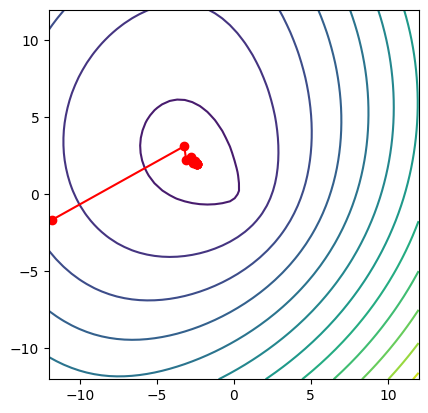

In [ ]:
l=QuasiNewtonOptimal(Jp,gr,2,X0,0.12,1e-5,1e-5,1500)[1]
lx0=[X[0] for X in l]
lx1=[X[1] for X in l]
aX0=np.linspace(-12,12)
aX1=np.linspace(-12,12)
Z=np.array([[Jp([x0,x1],gr,2) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)
plt.plot(lx0,lx1,"-ro")
plt.axis('scaled')
plt.show()

\
La méthode de Quasi Newton est moins stable mais plus  précis.  
 \

\
**Projections et mise en oeuvre pratique**  
 \

In [ ]:
!pip install geopandas
!pip install --upgrade geopandas

\
Coordonnées planes
UTM (Universal Transverse Mercator)

Cette projection$(EPSG\ \ 3395)$ associée au système géodésique WGS84, permet  de représenter les coordonnées cartésiennes d'un point du globe terrestre au moyen d'un quadrillage basé sur la projection dite de Mercator.

Il s'agit d'un système de projection mondial principalement utilisé par les Forces Armées et les GPS.  
  \

In [ ]:
df = pd.DataFrame(
    {'City': ['Alger','Antananarivo', 'Atlanta', 'Cape Town', 'Dakar', 'Irkoutsk', 'Le Caire','Libreville','Moscou', 'Nairobi', 'New Dehli', 'Paris', 'Pékin', 'Quito', 'Rome', 'Seattle', 'Sidney', 'Stockholm', 'Tokyo'],
     'Latitude': [44.125626, -18.879190, 33.748997, -33.928992, 14.693425,52.289597,30.0443879,0.390002,55.7504461,-1.2832533,43.6048243,48.8566969,39.9020803,-0.2201641,41.8933203,47.6038321,-33.8548157,59.3251172,35.6828387],
     'Longitude': [-84.120865, 47.507904, -84.387985, 18.417396, -17.447938,104.280586,31.2357257,9.454001,37.6174943,36.8172449,1.450963,2.3514616,116.7185213,-78.5123274,12.4829321,-122.3300624,151.2164539,18.0710935,139.7594549]})

In [ ]:
gdf = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df.Longitude, df.Latitude))

print(gdf)

            City   Latitude   Longitude                     geometry
0          Alger  44.125626  -84.120865   POINT (-84.12086 44.12563)
1   Antananarivo -18.879190   47.507904    POINT (47.5079 -18.87919)
2        Atlanta  33.748997  -84.387985     POINT (-84.38798 33.749)
3      Cape Town -33.928992   18.417396    POINT (18.4174 -33.92899)
4          Dakar  14.693425  -17.447938   POINT (-17.44794 14.69342)
5       Irkoutsk  52.289597  104.280586    POINT (104.28059 52.2896)
6       Le Caire  30.044388   31.235726    POINT (31.23573 30.04439)
7     Libreville   0.390002    9.454001           POINT (9.454 0.39)
8         Moscou  55.750446   37.617494    POINT (37.61749 55.75045)
9        Nairobi  -1.283253   36.817245    POINT (36.81724 -1.28325)
10     New Dehli  43.604824    1.450963     POINT (1.45096 43.60482)
11         Paris  48.856697    2.351462      POINT (2.35146 48.8567)
12         Pékin  39.902080  116.718521   POINT (116.71852 39.90208)
13         Quito  -0.220164  -78.5

In [ ]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='green', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

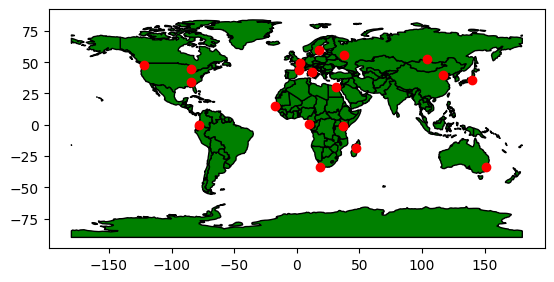

In [ ]:


import geopandas as gp

world = gp.read_file("ne_110m_admin_0_countries.shp")

ax = world.plot(
    color='green', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

In [ ]:
ville = gdf.set_crs("EPSG:4326")
ville=ville.to_crs('epsg:3395')  #projection sur le repère cartésien Mercator

ville.crs
print(ville.crs.coordinate_system)

xxx=ville.geometry.array.x,ville.geometry.array.y
Town=[]
for i in range(len(xxx[0])):
  Town.append([xxx[0][i],xxx[1][i]])
print(Town)
Conve=Conv(Town)
Xmin = descenteGradientConj(Jp,Town,2,isobary(Conve),0.12,1e-5)[0]
print(Xmin)


cartesian
[[-9364291.856889708, 5455143.936203585], [5288555.681935725, -2126898.5691049397], [-9394027.519270409, 3971410.7540337546], [2050215.1444580737, -3995422.4302263344], [-1942295.5735526083, 1643061.9153432236], [11608461.733144173, 6818832.686619223], [3477145.0794823687, 3487867.324534352], [1052414.5772790993, 43124.52619207724], [4187560.3103948706, 7473548.483019246], [4098476.954679248, -141906.82767652828], [161520.4623198806, 5375011.04218384], [261763.50793193636, 6218385.780546321], [12993046.357259857, 4824308.254325712], [-8739952.30716278, -24344.54663144598], [1389593.644979009, 5116473.103872711], [-13617720.255077383, 6009627.158103895], [16833338.64771253, -3985520.985888772], [2011664.926497636, 8214207.437905005], [15557951.353013484, 4232143.367422694]]
[1782019.9245585513, 3731773.619784068]


In [ ]:
ville.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
print(gradJ(Xmin,Town))

[-3.87002039636819e-07, -4.8445280560853454e-06]


In [ ]:
dfmin= pd.DataFrame({'City':['Minimum'],'x':[Xmin[0]],'y':[Xmin[1]]})
Xm=gp.GeoDataFrame(dfmin,geometry=gp.points_from_xy(dfmin['x'],dfmin['y']))

In [ ]:
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

--2024-12-26 23:54:57--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.179.177, 52.218.250.27, 52.92.177.217, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.179.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip.3’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.04s   

2024-12-26 23:54:57 (5.02 MB/s) - ‘ne_110m_admin_0_countries.zip.3’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
replace ne_110m_admin_0_countries.README.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: ne_110m_admin_0_countries.README.html  
replace ne_110m_admin_0_countries.VERSION.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ne_110m_admin_0_countries.VERSION.txt  
replace ne_110m_admin_0_countries

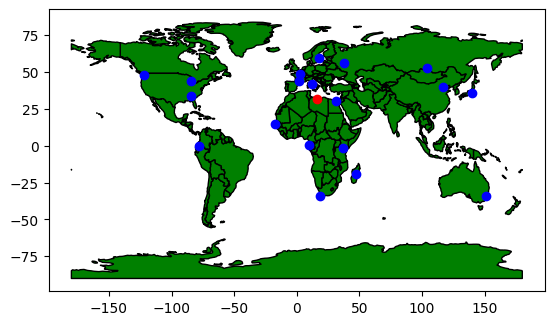

In [ ]:
Xmi=Xm.set_crs('epsg:3395')
Xmi=Xmi.to_crs("EPSG:4326") #reprojection sur le répère géospatial(latitude,longitude)
world = gp.read_file("ne_110m_admin_0_countries.shp")

ax = world.plot(
    color='green', edgecolor='black')

gdf.plot(ax=ax, color='blue')
Xmi.plot(ax=ax,color="red")  #l'optimum est le point rouge
plt.show()

In [ ]:
Xmi.geometry

,geometry
0,POINT (16.00816 31.93187)


\
Le point longitude 16.00816 et latitude 31.93187 se trouve à Libye,entre la ville **Syrte** et celle de **Misrata**.  
 \

\
**2.2 Déformation des géodésiques
de la sphère par la projection**  
 \



\
Nous définissons :
*  $d$ la distance du grand cercle entre les deux points.
*   $r$ est le rayon de la sphère
*   $\phi_1, \phi_2$: latitude du point 1 et latitude du point 2
*  $\lambda_1, \lambda_2$: longitude du point 1 et longitude du point 2  

$d = 2r arcsin$$\sqrt{sin^2(\frac{\phi_1 - \phi_2}{2}) + cos(\phi_1)cos(\phi_2)sin^2(\frac{\lambda_1 - \lambda_2}{2})}$  

Donc nous posons $f(X)$ la somme des distances entre $X$ et les $X_i$ avec $X=(\phi,\lambda)$.

$f(X) = 2r \sum_i^n arcsin(\sqrt{sin^2(\frac{\phi - \phi_i}{2}) + cos(\phi)cos(\phi_i)sin^2(\frac{\lambda - \lambda_i}{2})}$   

Soit $a(X,x_i) = \sqrt{sin^2(\frac{\phi - \phi_i}{2}) + cos(\phi)cos(\phi_i)sin^2(\frac{\lambda - \lambda_i}{2})}$

$gradf(X) = 2r\sum_i^n\frac{a'(X,x_i)}{\sqrt{1 - a^2(X,x_i)}}$  
 \

In [ ]:
def a(X,xi):
    phi, phii = math.radians(X[0]), math.radians(xi[0])
    dphi       = math.radians(X[0] - xi[0])
    dlambda    = math.radians(X[1] - xi[1])

    a = (math.sin(dphi/2.0)**2.0) + math.cos(phi)*math.cos(phii)*(math.sin(dlambda/2.0)**2.0)
    return math.sqrt(a)

def f(X,Xi,r=6372800): #r rayon de la Terre
  f=0
  for i in range(len(Xi)):
    f+=math.asin(a(X,Xi[i]))
  return 2*r*f


In [ ]:
def aprime(X,xi):
    phi, phii = math.radians(X[0]), math.radians(xi[0])
    dphi       = math.radians(X[0] - xi[0])
    dlambda    = math.radians(X[1] - xi[1])
    ap1 = ((math.sin(dphi))/2.0 - math.sin(phi)*math.cos(phii)*((math.sin(dlambda/2.0))**2))/(2*a(X,xi))
    ap2 = (math.cos(phi)*math.cos(phii)*math.sin(dlambda))/(4*a(X,xi))
    return [ap1,ap2]


In [ ]:
def gradf(X,Xi,r=1):
  gradf=[0,0]
  for i in Xi:
    ap=aprime(X,i)
    gradf[0]=ap[0]/math.sqrt(1-(a(X,i)**2.0))
    gradf[1]=ap[1]/math.sqrt(1-(a(X,i)**2.0))
  return [2*r*gradf[0],2*r*gradf[1]]



In [ ]:
def QuasiNewtonOptimal1(Jp,Xi,p,X0,alpha0,tol,tolrecherche=1e-5,N=1500):
    X=X0
    JX=Jp(X0,Xi,p)
    g=gradf(X0,Xi,p)
    S0=np.array([[1,0],[0,1]])    #initialisation par identité
    lX=[X]
    n=0
    alpha=alpha0
    while np.linalg.norm(np.array(g),)>tol and n<N:
        n+=1
        gg=(np.dot(S0,-1*np.array(g).reshape(2,1))).reshape(1,2)
        gg=gg[0]
        g0=g
        rp=recherchePasOptimal(Jp,Xi,p,X,JX,gg,alpha,tolrecherche)
        X=rp[0]
        alpha=rp[1]
        JX=rp[2]
        #print(X)
        g=gradJ(X,Xi,p)
        deltak=np.add(np.array(X),-1*np.array(lX[-1]))
        gammak=np.add(np.array(g),-1*np.array(g0))
        Skgamkd= np.add(deltak,-1*np.dot(S0,gammak))
        tsk=np.transpose(Skgamkd)
        S0 =  np.add(S0,1/((np.dot(tsk,deltak))*(np.dot(Skgamkd,tsk))))
        lX.append(X)
    if n==N:
        print("Nombre d’itérations maximal atteint : ",N)
    return X

In [ ]:
from collections import OrderedDict
old_settings = np.seterr(all='print')
OrderedDict(np.geterr())
ville_=gdf.geometry.array.x,gdf.geometry.y
#print(ville_)
Town1=[]
for i in range(len(ville_[0])):
  Town1.append([ville_[0][i],ville_[1][i]])
#print(Town1)
Conve1=Conv(Town1)
Xmin1 = QuasiNewtonOptimal1(f,Town1,6372800,isobary(Conve1),0.12,1e-5)
print(Xmin1)
print(gradf(Xmin1,Town1))

[18.314326187499983, 20.080801275]
[0.9997190617308463, -0.022501677614816605]


In [ ]:
dfmin1= pd.DataFrame({'City':['Minimum'],'latitude':[Xmin1[0]],'longitude':[Xmin1[1]]})
Xm1=gp.GeoDataFrame(dfmin1,geometry=gp.points_from_xy(dfmin1['longitude'],dfmin1['latitude']))

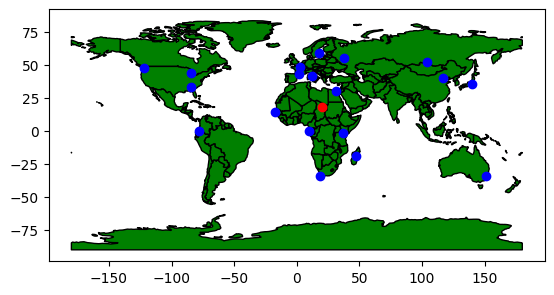

In [ ]:
Xmi1=Xm1.set_crs("EPSG:4326")

world = gp.read_file("ne_110m_admin_0_countries.shp")

ax = world.plot(
    color='green', edgecolor='black')

gdf.plot(ax=ax, color='blue')
Xmi1.plot(ax=ax,color="red")  #l'optimum est le point rouge
plt.show()

In [ ]:
Xmi1.geometry

,geometry
0,POINT (20.0808 18.31433)


\
Le POINT latitude 18.31433 et longitude 20.08080 correspond à la ville de **Ennedi Ouest, Tchad**.  
 \

\
**2.3** Les optimums obtenus sont donc très différents suivant ces deux méthodes.  
 \

\
**3 CAS CONTRAINT**  
 \

**3.**

\\
Les coordonnées Moscou$(55.7504461,37.6174943)$, Lincoln Nebraska$(40.8088861,-96.7077751)$, Kisangani$(0.5184021,25.2057292)$, Cuiabá$(-15.5986686,-56.0991301)$.  
 \\

In [ ]:
def hvil(x,vil,R,p=2):
  dis=distance.minkowski(x,vil,p)-R
  return dis


\\
Ramenons à une optimisation dans le plan à l’aide du système de projection cartésien  
 \\

In [ ]:
dfvil= pd.DataFrame({'City':['Moscou','Lincoln Nebraska','Kisangani','Cuiabá'],'latitude':[55.7504461,40.8088861,0.5184021,-15.5986686],'longitude':[37.6174943,-96.7077751,25.2057292,-56.0991301]})
vil=gp.GeoDataFrame(dfvil,geometry=gp.points_from_xy(dfvil['longitude'],dfvil['latitude']))

In [ ]:
villes = vil.set_crs("EPSG:4326")
villes=villes.to_crs('epsg:3395')  #projection sur le repère cartésien
#print(villes.crs.coordinate_system)
#print(villes.geometry)
xx=villes.geometry.array.x,villes.geometry.array.y
Towns=[]
for i in range(len(xx[0])):
  Towns.append([xx[0][i],xx[1][i]])
#print(Towns)
Rayons = [1000000,1500000,1500000,1500000]


In [ ]:
villes



,City,latitude,longitude,geometry
0,Moscou,55.750446,37.617494,POINT (4187560.31 7473548.483)
1,Lincoln Nebraska,40.808886,-96.707775,POINT (-10765460.28 4956261.952)
2,Kisangani,0.518402,25.205729,POINT (2805888.94 57322.729)
3,Cuiabá,-15.598669,-56.099130,POINT (-6244926.597 -1746809.426)


In [ ]:
def theta (X,Towns,Rayons,p=2):
  theta = []
  for i in range(len(Rayons)):
    theta.append(hvil(X,Towns[i],Rayons[i],p))
  return theta



In [ ]:
print(X0)
print(Rayons)
print(distance.euclidean(X0,Towns[0])-Rayons[0])
print(theta(X0,Towns,Rayons))

[-11.833333333333334, -1.6666666666666667]
[1000000, 1500000, 1500000, 1500000]
7566779.5757098105
[7566779.5757098105, 10351558.09638554, 1306486.2789661405, 4984620.093030298]


In [ ]:
def dxL(X,Xi,Y,Towns,p=2):
  points = Xi+Towns
  d = gradJ(X,Xi,p)

  n=len(Towns)
  for i in range(n):
    y=Towns[i]
    di=(distance.minkowski(X,y,p))**(1-p)
    grad1 = (X[0]-y[0])*(abs(X[0]-y[0])**(p-2))*di
    grad2 = (X[1]-y[1])*(abs(X[1]-y[1])**(p-2))*di
    a,b=d[0],d[1]
    d[0]=Y[i]*grad1 + a
    d[1]=Y[i]*grad2 + b
  return d



\
Comme nous projetons sur $K=\mathbb R_{+}^4$.  $(\mathbb P_{K}(w))_i = max(w_i,0)$  
 \

In [ ]:
def projK(W):
  pk=[]
  for i in range(len(W)):
    pk.append(max(W[i],0))
  return pk



\
**Arrow Hurwicz**  
 \


In [ ]:
def Arrow_Hurwicz(alpha,rho,X0,Y0,Xi,eps,Towns,Rayons,p=2,N=1500):
  X=X0
  Y=Y0
  gX=dxL(X0,Xi,Y0,Towns,p)
  thet=theta(X,Towns,Rayons)
  n=0
  #print(distance.minkowski(np.array(gX),np.array([0,0]),p),distance.minkowski(np.array(gX),np.array([0,0]),p)>eps)
  while np.linalg.norm(np.array(thet))>eps and n<N:
    n+=1
    X = np.add(np.array(X),-1*alpha*np.array(gX))
    thet=theta(X,Towns,Rayons,p)
    W = np.add(np.array(Y),-1*rho*np.array(thet))
    Y = projK(W)
    #print(X)
    gX=dxL(X,Xi,Y,Towns,p)
  if n==N:
      print("Nombre d’itérations maximal atteint : ",N)

  return X

In [ ]:
X0 = isobary(Conve)
Y0 = [20000,20000,20000,20000]
alpha = 0.1
rho=0.1
Xi=Town
xh= Arrow_Hurwicz(alpha,rho,X0,Y0,Xi,1e-5,Towns,Rayons,2,1500)
print(xh)

Nombre d’itérations maximal atteint :  1500
[2036347.16790211 2654726.40886647]


In [ ]:
Towns

[[4187560.3103948706, 7473548.483019246],
 [-10765460.279882422, 4956261.951896763],
 [2805888.9396171467, 57322.729371234185],
 [-6244926.596677606, -1746809.4264092806]]

In [ ]:
gradJ(xh,Town,2)

[0.27148393616131405, -1.9063713572333574]

\\

In [ ]:
dfminh= pd.DataFrame({'City':['Minimum'],'x':[xh[0]],'y':[xh[1]]})
Xmh=gp.GeoDataFrame(dfminh,geometry=gp.points_from_xy(dfminh['x'],dfminh['y']))

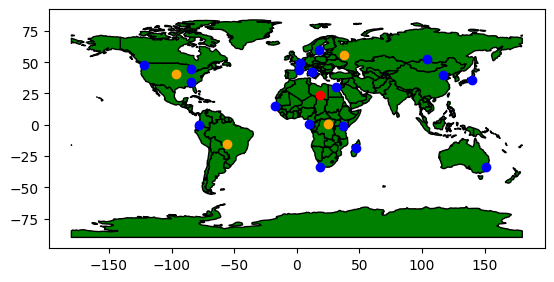

In [ ]:
Xmhi=Xmh.set_crs('epsg:3395')
Xmhi=Xmhi.to_crs("EPSG:4326") #reprojection sur le répère géospatial(latitude,longitude)
world = gp.read_file("ne_110m_admin_0_countries.shp")

ax = world.plot(
    color='green', edgecolor='black')

gdf.plot(ax=ax, color='blue')
Xmhi.plot(ax=ax,color="red")  #l'optimum est le point rouge
vil.plot(ax=ax, color='orange')
plt.show()

In [ ]:
for i in Towns:
  print(distance.minkowski(xh,i,10))

4818973.536602538
12801807.492942596
2597405.0330190714
8282762.497479


In [ ]:
Xmhi.geometry

,geometry
0,POINT (18.29282 23.32723)


\
**1.** Si nous choisissons la boule de rayon la plus grande distance entre l'isobarycentre des sommets de l'enveloppe convexe, elle contient l'optimum. Et n'importe de l'enveloppe différent des sommets vérifie la condition de **Slater**.  
 \

**Distance plus grande**

In [ ]:
dka=[]
ddd=[]
for i in range(len(Town)):
  dka.append(Town[i])
  ddd.append(distance.minkowski(Xmin,Town[i],2))
print(ddd)

[11172301.612702345, 7731848.903805177, 3760113.84115372, 6827871.764658899, 16914456.28262146, 4513465.783789008, 13785015.654900225, 11264135.368611315, 10299946.227997921, 1712582.7196716478, 4448314.700538641, 1439232.7977571923, 4488312.57386892, 2307866.489528991, 2914518.761364407, 11278753.103812858, 4270040.106806861, 15567293.09617859, 11178616.301798146]


In [ ]:
dismax=0
centre=isobary(Conve)
print(centre)
for i in Town:
  if dismax < distance.minkowski(centre,i,2):
    dismax = distance.minkowski(centre,i,2)
print(dismax)

[2038741.4654144156, 2655116.6801672527]
16216601.814138044


In [ ]:
len(Town)

19

In [ ]:
Arrow_Hurwicz()
xhj= Arrow_Hurwicz(alpha,0.15,isobary(Conve),[0.0]*19,Town,1e-5,Town,ddd,2,1500)
print(xhj)

Nombre d’itérations maximal atteint :  1500
[47477482.8973757   9957669.26998475]


In [ ]:
dfminhj= pd.DataFrame({'City':['Minimum'],'x':[xhj[0]],'y':[xhj[1]]})
Xmhj=gp.GeoDataFrame(dfminhj,geometry=gp.points_from_xy(dfminhj['x'],dfminhj['y']))

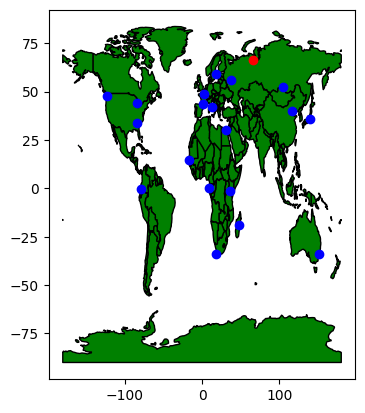

In [ ]:
Xmhjj=Xmhj.set_crs('epsg:3395')
Xmhjj=Xmhjj.to_crs("EPSG:4326") #reprojection sur le répère géospatial(latitude,longitude)
world = gp.read_file("ne_110m_admin_0_countries.shp")

ax = world.plot(
    color='green', edgecolor='black')

gdf.plot(ax=ax, color='blue')
Xmhjj.plot(ax=ax,color="red")  #l'optimum est le point rouge
#vil.plot(ax=ax, color='orange')
plt.show()